In [1]:
!pip install opencv-python

In [2]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('animal')
files.close()

In [3]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [4]:
# Reading images

In [5]:
dog_files = glob('animal/training_set/training_set/dogs/*.jpg')
cat_files = glob('animal/training_set/training_set/cats/*.jpg')

In [6]:
len(cat_files)

21

In [7]:
img_mpl = plt.imread(cat_files[1])
img_cv2 = cv2.imread(cat_files[1])
print(img_mpl.shape) 
print(img_cv2.shape)

(374, 500, 3)
(374, 500, 3)


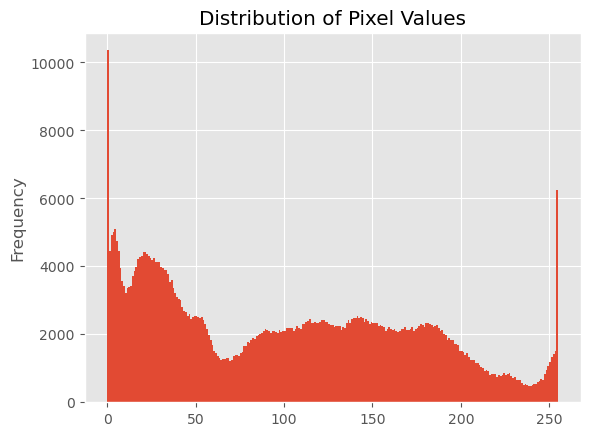

In [8]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=255, title='Distribution of Pixel Values')
plt.show()

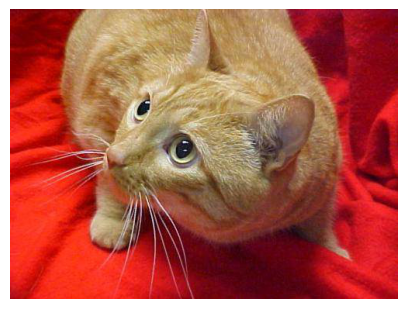

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

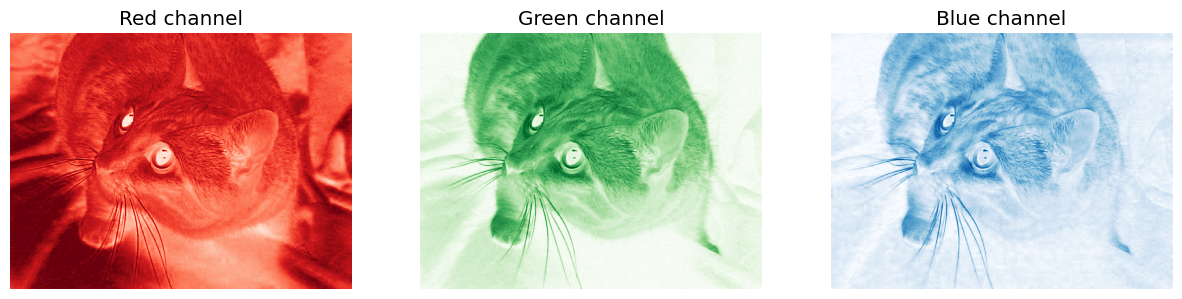

In [10]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

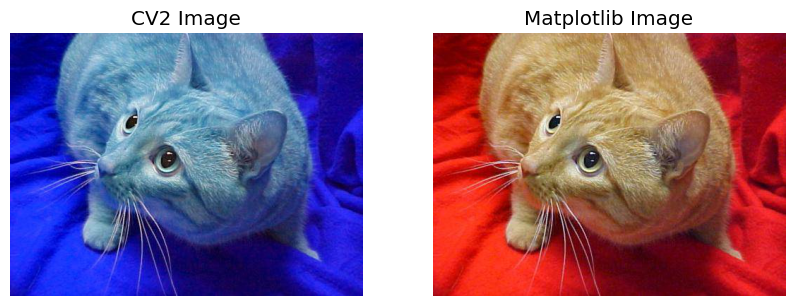

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()
# Open CV works in BGR
# Regular image works in RGB

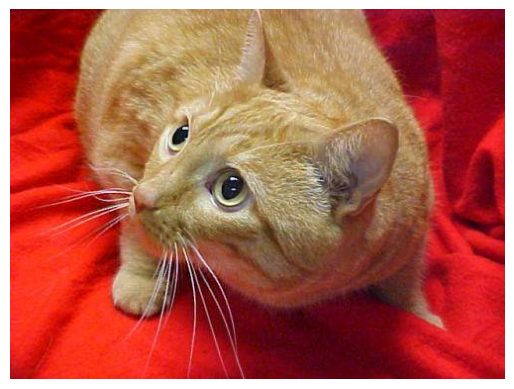

In [12]:
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

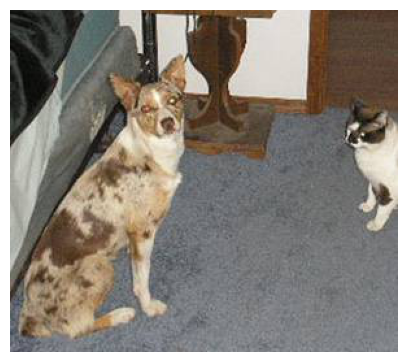

In [13]:
img = plt.imread(dog_files[7])
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img)
ax.axis('off')
plt.show()

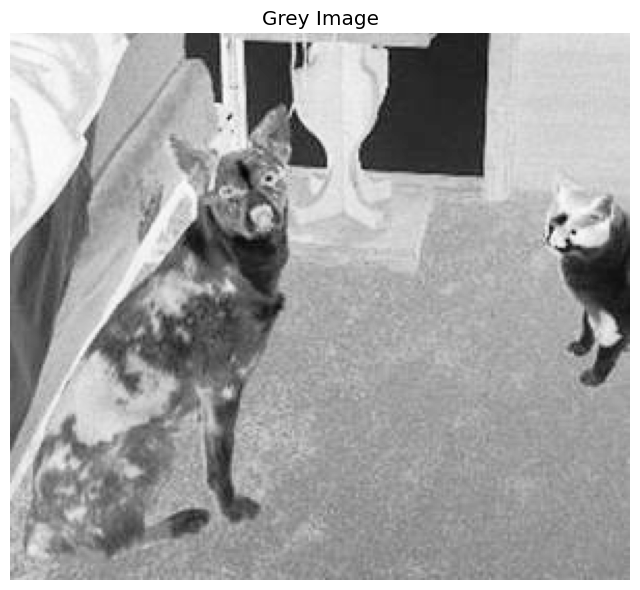

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [15]:
print(img_gray)
print(len(img_gray))

[[ 21  21  20 ...  54  54  53]
 [ 21  22  24 ...  53  53  52]
 [ 11  13  15 ...  60  60  59]
 ...
 [138 125 112 ... 127 129 132]
 [121 119 111 ... 124 124 124]
 [112 109  93 ... 137 134 130]]
264


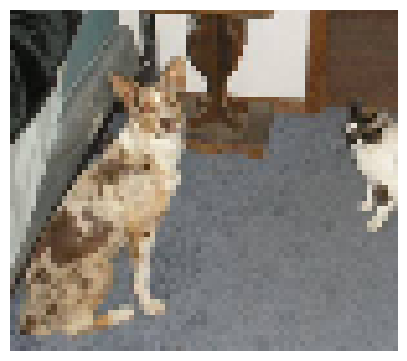

In [16]:
#Resize
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

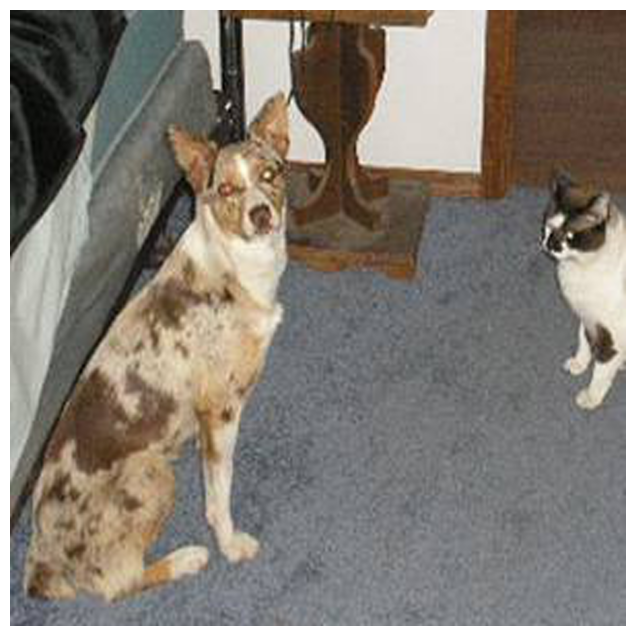

In [17]:
#Interpolation
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

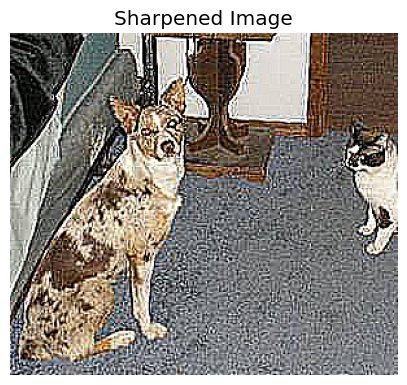

In [18]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

In [19]:
plt.imsave('mpl_dog.png', sharpened)
cv2.imwrite('cv2_dog.png', sharpened)

True